# W261 Final Project: Click Through Rate Prediction
__`MIDS w261: Machine Learning at Scale | UC Berkeley School of Information | Fall 2018`__


# Section1: Introduction

# Notebook Set-Up


In [101]:
# imports
import re
import ast
import time
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

In [102]:
%reload_ext autoreload
%autoreload 2

In [103]:
# store path to notebook
PWD = !pwd
PWD = PWD[0]

In [104]:
# start Spark Session
from pyspark.sql import SparkSession
app_name = "hw5_notebook"
master = "local[*]"
spark = SparkSession\
        .builder\
        .appName(app_name)\
        .master(master)\
        .getOrCreate()
sc = spark.sparkContext

In [105]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

from pyspark.sql import functions as F

__`REMINDER`__: If you are running this notebook on the course docker container, you can monitor the progress of your jobs using the Spark UI at: http://localhost:4040/jobs/

# Section2: Problem definition


# Section3: Algorithm 
    
##Algorithm description with math
##Toy example

### Data Download

In [5]:
!mkdir data

mkdir: cannot create directory `data': File exists


# Small sample

In [5]:
!head -n 2000 data/train.txt > data/train_top2000.txt
!head -n 2000 data/test.txt > data/test_top2000.txt

# Section4: EDA



## EDA2
## EDA3

## EDA discussion including challenges 

In [6]:
# !cat data/train.txt | wc

In [106]:
# bigtrainRDD = sc.textFile('data/train.txt').cache()
# bigtrainRDD.count()

In [107]:
# trainRDDsample=bigtrainRDD.takeSample(False,2000,seed=201812).cache()
# trainRDDsample.count()trainRDDsample.count()

In [108]:
# bigtestRDD = sc.textFile('data/test.txt').cache()
# bigtestRDD.count()
# testRDDsample=bigtestRDD.takeSample(False,2000).cache()

In [109]:
# trainRDD = sc.textFile('wip/w261_final_project/data/train.tiny.csv').cache()
# trainDF = spark.read.csv('wip/w261_final_project/data/train.tiny.csv')
# trainRDD.count()

In [110]:
toptrainRDD = sc.textFile('data/train_top2000.txt').cache()
toptrainRDD.count()
# train_df = pd.DataFrame(np.array(sample), columns = FIELDS)
# train_df[FIELDS[:-1]].hist(figsize=(15,15), bins=15)
# plt.show()

2000

In [111]:
toptestRDD = sc.textFile('data/test_top2000.txt').cache()
toptestRDD.count()

2000

In [86]:
# def parse(line):
#     vals=line.split("\t")
#     return(vals)

# means=toptrainRDD.map(lambda x:parse(x)[0:12]).collect()
# # print(means)

In [87]:
# df=pd.DataFrame(np.array(means),columns=["l0","l1","l2","l3","l4","l5","16","l7","l8","l9","l10","l11"])

In [88]:
# df
# df["l2"].astype(float).mean()

In [112]:
data = sqlContext.read.option("delimiter", "\t").csv("/media/notebooks/Assignments/FinalProject/data/train_top2000.txt")



In [113]:
data.head()

Row(_c0='0', _c1='1', _c2='1', _c3='5', _c4='0', _c5='1382', _c6='4', _c7='15', _c8='2', _c9='181', _c10='1', _c11='2', _c12=None, _c13='2', _c14='68fd1e64', _c15='80e26c9b', _c16='fb936136', _c17='7b4723c4', _c18='25c83c98', _c19='7e0ccccf', _c20='de7995b8', _c21='1f89b562', _c22='a73ee510', _c23='a8cd5504', _c24='b2cb9c98', _c25='37c9c164', _c26='2824a5f6', _c27='1adce6ef', _c28='8ba8b39a', _c29='891b62e7', _c30='e5ba7672', _c31='f54016b9', _c32='21ddcdc9', _c33='b1252a9d', _c34='07b5194c', _c35=None, _c36='3a171ecb', _c37='c5c50484', _c38='e8b83407', _c39='9727dd16')

In [114]:
data.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)
 |-- _c20: string (nullable = true)
 |-- _c21: string (nullable = true)
 |-- _c22: string (nullable = true)
 |-- _c23: string (nullable = true)
 |-- _c24: string (nullable = true)
 |-- _c25: string (nullable = true)
 |-- _c26: string (nullable = true)
 |-- _c27: string (nullable = tru

In [115]:
# oldColumns = data.schema.names
# newColumns=['l1','l2','l3','l4','l5','l6','l7','l8','l9','l10','l11','l12','l13','c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13','c14','c15','c16','c17','c18','c19','c20','c21','c22','c23','c24','c25','c26']
# data = .reduce(lambda data, idx: data.withColumnRenamed(oldColumns[idx], newColumns[idx]), xrange(len(oldColumns)), data)
# data.printSchema()


In [119]:
df = data.selectExpr("_c0 as l1", "_c1 as l2")
df.show()
df.printSchema()

+---+----+
| l1|  l2|
+---+----+
|  0|   1|
|  0|   2|
|  0|   2|
|  0|null|
|  0|   3|
|  0|null|
|  0|null|
|  1|   1|
|  0|null|
|  0|null|
|  0|null|
|  0|   0|
|  1|   0|
|  1|null|
|  0|   0|
|  0|null|
|  1|   1|
|  0|   0|
|  0|   0|
|  0|   7|
+---+----+
only showing top 20 rows

root
 |-- l1: string (nullable = true)
 |-- l2: string (nullable = true)



In [120]:
print((data.count(), len(data.columns)))

(2000, 40)


In [122]:
#Try parquet - prob not required. Gives error second time as cannot overwrite parquet
# data.write.format("parquet").save("/media/notebooks/Assignments/FinalProject/data/data.parquet")
data_parquet = spark.read.parquet("/media/notebooks/Assignments/FinalProject/data/data.parquet")


In [123]:
%%time
data_parquet.count()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 93.6 ms


2000

In [124]:
data_parquet.agg(F.avg(data_parquet._c0)).collect()
#Can expand this to more columns

[Row(avg(_c0)=0.209)]

In [125]:
#Change data types of numeric columns

import types
from pyspark.sql.types import DoubleType
data = data.withColumn("_c0", data["_c0"].cast(DoubleType()))
data = data.withColumn("_c1", data["_c1"].cast(DoubleType()))
data = data.withColumn("_c2", data["_c2"].cast(DoubleType()))
data = data.withColumn("_c3", data["_c3"].cast(DoubleType()))
data = data.withColumn("_c4", data["_c4"].cast(DoubleType()))
data = data.withColumn("_c5", data["_c5"].cast(DoubleType()))
data = data.withColumn("_c6", data["_c6"].cast(DoubleType()))
data = data.withColumn("_c7", data["_c7"].cast(DoubleType()))
data = data.withColumn("_c8", data["_c8"].cast(DoubleType()))
data = data.withColumn("_c9", data["_c9"].cast(DoubleType()))
data = data.withColumn("_c10", data["_c10"].cast(DoubleType()))
data = data.withColumn("_c11", data["_c11"].cast(DoubleType()))
data = data.withColumn("_c12", data["_c12"].cast(DoubleType()))


In [126]:
data.groupBy("_c0").count().show()

+---+-----+
|_c0|count|
+---+-----+
|0.0| 1582|
|1.0|  418|
+---+-----+



In [128]:
def plot_hist(hist_list):
    pd.DataFrame(
        list(zip(*hist_list)), 
        columns=['bin', 'frequency']
    ).set_index(
        'bin'
    ).plot(kind='bar');

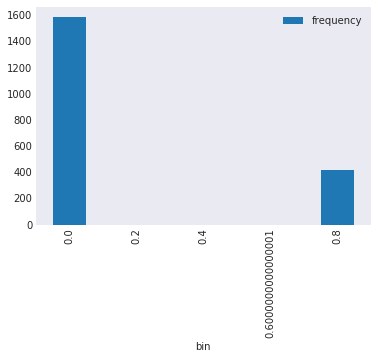

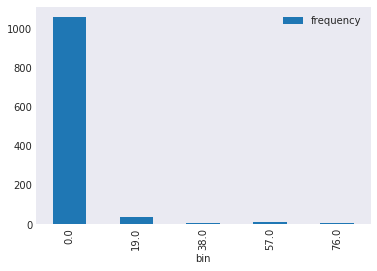

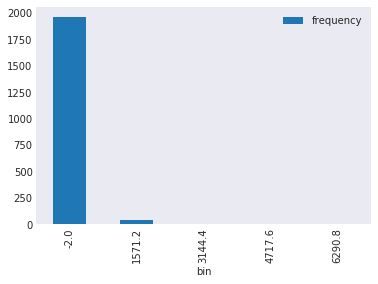

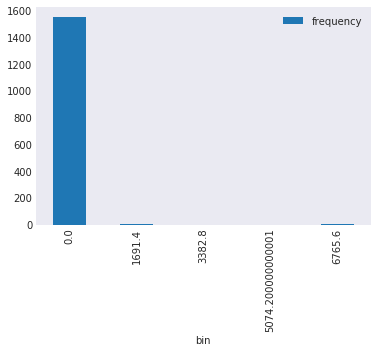

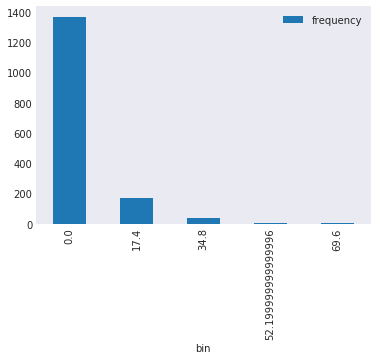

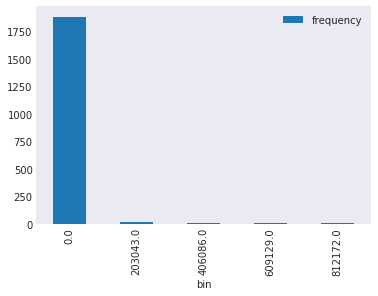

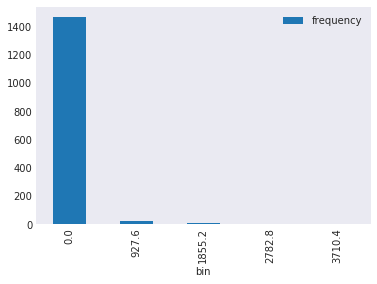

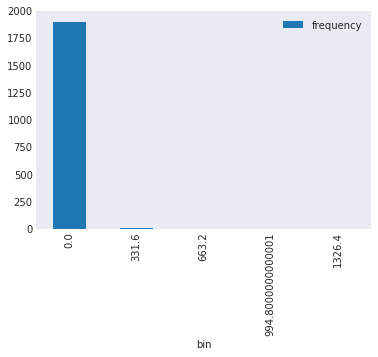

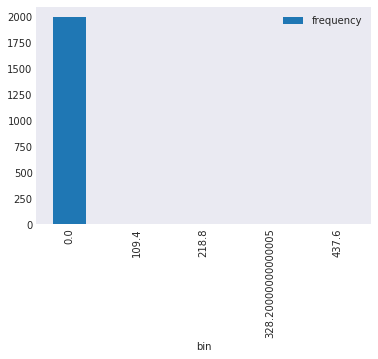

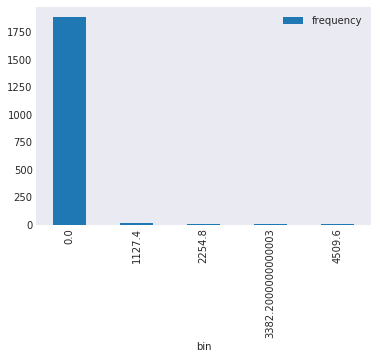

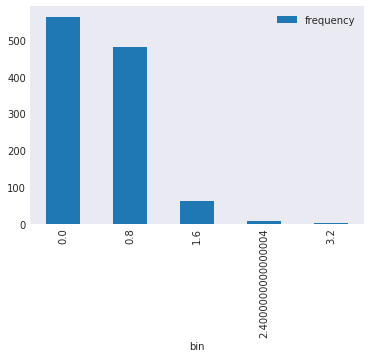

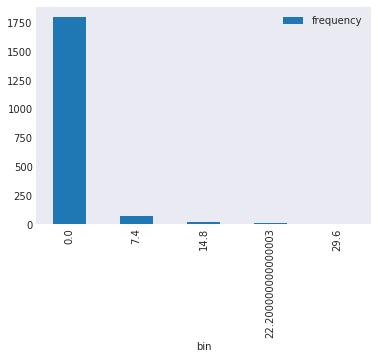

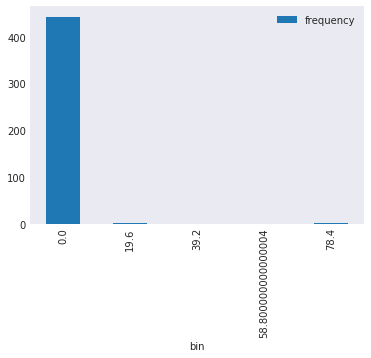

In [132]:
cols=['_c0','_c1','_c2','_c3','_c4','_c5','_c6','_c7','_c8','_c9','_c10','_c11','_c12']

for c in cols:
    temp_hist = data.select(c).rdd.flatMap(lambda x: x).histogram(5)

    # Loading the Computed Histogram into a Pandas Dataframe for plotting
    plot_hist(temp_hist)

In [138]:
# cols=['_c13','_c14','_c15','_c16','_c17','_c18','_c19','_c20','_c21','_c22','_c23','_c24','_c25','_c26','_c27','_c28','_c29','_c30','_c31','_c32','_c33','_c34','_c35','_c36','_c37','_c38','_c39']
cols=['_c13']
for c in cols:
    temp_hist = data.select(c).rdd.map(lambda x: (x,1)).collect()
    
#     .reduce(lambda a,b:a+b)
    print(temp_hist)

[(Row(_c13='2'), 1), (Row(_c13='4'), 1), (Row(_c13='45'), 1), (Row(_c13=None), 1), (Row(_c13='0'), 1), (Row(_c13=None), 1), (Row(_c13=None), 1), (Row(_c13='0'), 1), (Row(_c13='8'), 1), (Row(_c13='1'), 1), (Row(_c13='2'), 1), (Row(_c13='6'), 1), (Row(_c13=None), 1), (Row(_c13='5'), 1), (Row(_c13='4'), 1), (Row(_c13='20'), 1), (Row(_c13='2'), 1), (Row(_c13='1'), 1), (Row(_c13='2'), 1), (Row(_c13='3'), 1), (Row(_c13='6'), 1), (Row(_c13='4'), 1), (Row(_c13='6'), 1), (Row(_c13='17'), 1), (Row(_c13=None), 1), (Row(_c13=None), 1), (Row(_c13='16'), 1), (Row(_c13='2'), 1), (Row(_c13='15'), 1), (Row(_c13='13'), 1), (Row(_c13='3'), 1), (Row(_c13=None), 1), (Row(_c13=None), 1), (Row(_c13='8'), 1), (Row(_c13='1'), 1), (Row(_c13='3'), 1), (Row(_c13=None), 1), (Row(_c13=None), 1), (Row(_c13='12'), 1), (Row(_c13='20'), 1), (Row(_c13='4'), 1), (Row(_c13='4'), 1), (Row(_c13='5'), 1), (Row(_c13=None), 1), (Row(_c13=None), 1), (Row(_c13='1'), 1), (Row(_c13='40'), 1), (Row(_c13='11'), 1), (Row(_c13='4'), 1

# Section4: Implementation 

# Section5: Course concepts 

● scalability / time complexity / I/O vs Memory  
● functional programming / higher order functions / map reduce paradigm  
● bias variance tradeoff / model complexity / regularization  
● associative/commutative operations  
● race conditions / barrier synchronization / statelessness  
● the shuffle / combiners / local aggregation  
● order inversion pattern / composite keys  
● total order sort / custom partitioning  
● broadcasting / caching / DAGs / lazy evaluation  
● GD - convex optimization / Batch vs stochastic  
● sparse representation (pairs vs stripes)  
● preserving the graph structure / additional payloads  
● One Hot Encoding / vector embeddings / feature selection  